# Haberman Cancer Survival


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Description:

The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1.Age of patient at time of operation (numerical)
2.Patient's year of operation (year - 1900, numerical)
3.Number of positive axillary nodes detected (numerical)
4.Survival status (class attribute)
1 = the patient survived 5 years or longer
2 = the patient died within 5 year


In [63]:
#load data into DataFrame
haberman = pd.read_csv("haberman.csv")
haberman

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1
5,33,60,0,1
6,34,59,0,2
7,34,66,9,2
8,34,58,30,1
9,34,60,1,1


In [64]:
haberman.shape

(305, 4)

In [65]:
haberman.columns

Index(['30', '64', '1', '1.1'], dtype='object')

In [66]:
haberman.rename(columns={'30':'Age','64':'YOP(year - 1900)','1':'positive axillary nodes','1.1':'Survival status'},inplace=True)

In [67]:
haberman.columns

Index(['Age', 'YOP(year - 1900)', 'positive axillary nodes',
       'Survival status'],
      dtype='object')

In [68]:
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
Age                        305 non-null int64
YOP(year - 1900)           305 non-null int64
positive axillary nodes    305 non-null int64
Survival status            305 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [69]:
haberman.describe()

,Age,YOP(year - 1900),positive axillary nodes,Survival status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


First Impresion of the data:
1. There are total 305 rows with 4 columns.
2. There is no null value in the data.
3. Patient Age varies From 30(min) to 83(max).
4. This Data contain value of Year of operation ranging from 1958 to 1969.


# Objective:

To Determine Classify a patient as belonging to Survived or Not Survived Status given the 3 features(Age,YOP(year - 1900),positive axillary nodes).

# About the features:

Age: Age of the patient at the time of operation.
YOP(year - 1900): Year of operation
positive axillary nodes: Number of positive axillary nodes detected.


# EDA

In [70]:
print(haberman["Survival status"].value_counts())

1    224
2     81
Name: Survival status, dtype: int64


Survival rate in our data is much more high than non-survival.
Total 224 number of patients survived for more than 5 years and total 81 number of patients died within 5 years of operation.

# Univariate Analysis

1. Taking one feature at a time.
2. First we will take Age.


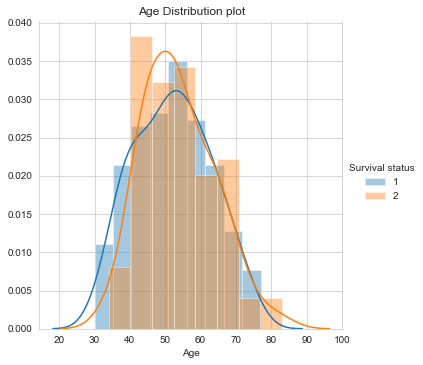

In [71]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend();
plt.title("Age Distribution plot")
plt.show();

Observation(s):
1. Number of patients of age(30-40) of surival status = 1 are more.
2. Number of patients of age(40-50) of survial status = 2 are more.
3. chance of survival of Patients whose age is 75+ is nearly zero%.

2.YOP(year - 1900)

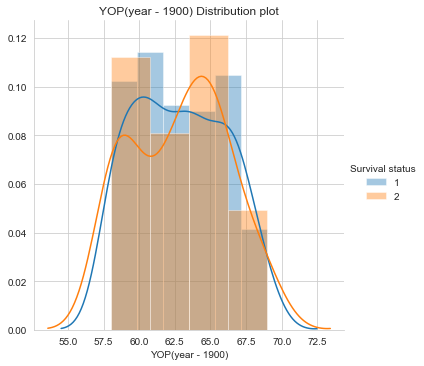

In [72]:
sns.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sns.distplot, "YOP(year - 1900)") \
   .add_legend();
plt.title("YOP(year - 1900) Distribution plot")
plt.show();

3. positive axillary nodes

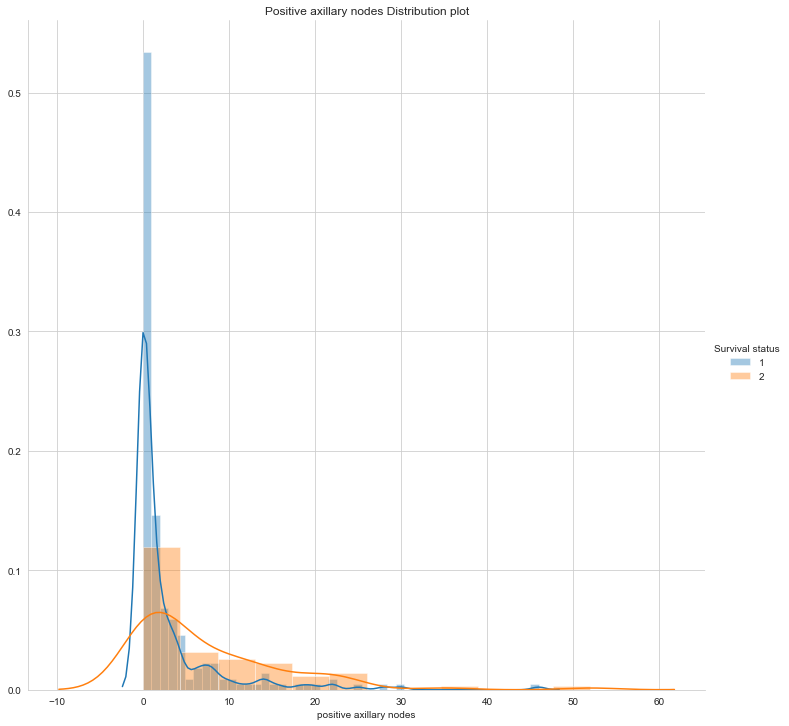

In [73]:
sns.FacetGrid(haberman,hue="Survival status",size=10) \
    .map(sns.distplot, "positive axillary nodes") \
    .add_legend();
plt.title("Positive axillary nodes Distribution plot")
plt.show()


Observation(s):
1. Data is highly overlapping in this case.
2. Patients having positive axillary nodes <=2 are more likely to survive more than 5 years.
3. Survival rate decreases as number of positive axillary nodes increases.


# Bivariate Analysis:

Pair-Plot:

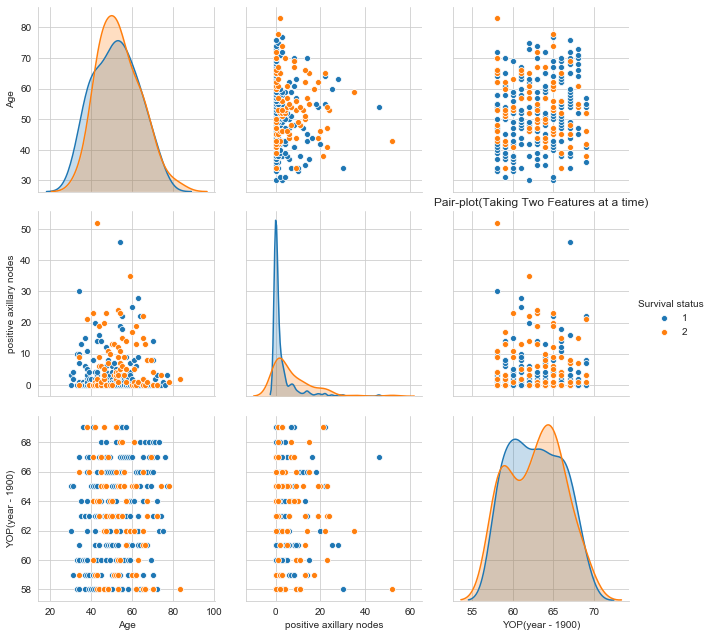

In [74]:
sns.set_style("whitegrid")
sns.pairplot(haberman,hue="Survival status",size=3,vars=["Age","positive axillary nodes","YOP(year - 1900)"])
plt.title("Pair-plot(Taking Two Features at a time)")
plt.show()

Obeservation(s):
1. All the plots are highly overlapping but from the Age-Postive axillary nodes plot we can conclude that the patients having high number of positive axillary nodes and belongs to higher age group have more chance of having Survival Status 2. 

# CDF's and PDF's

In [75]:
Survived = haberman[haberman["Survival status"]==1]
Not_survived = haberman[haberman["Survival status"]==2]

Age(Survived):

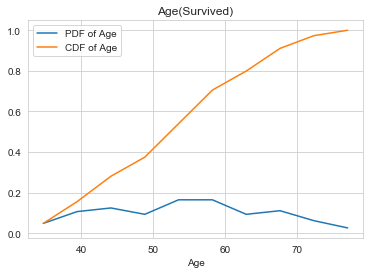

In [76]:
counts,bin_edges = np.histogram(Survived['Age'],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age")
plt.legend(['PDF of Age','CDF of Age'])
plt.title("Age(Survived)")
plt.show()

Observation(s):
1. Almost 95% of patients survived are of Age <=70.
2. Around 45% of patients survived are of Age <=50.
3. For the Age group (53-58), chances of survival found to be near 18%(highest in the Data).

Age(Not_survived):

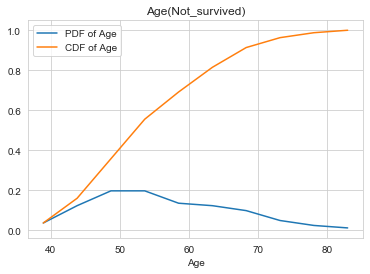

In [77]:
counts,bin_edges = np.histogram(Not_survived["Age"],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age")
plt.legend(['PDF of Age','CDF of Age'])
plt.title("Age(Not_survived)")
plt.show()


Observation(s):
1. Chances of patient's not survival in the age group(48-53) is 20%.
2. 10% of the patient not survived are of age 70+.
3. Chances of survival of patient of age 75+ is nearly zero%.

YOP(year - 1900)(Survived):

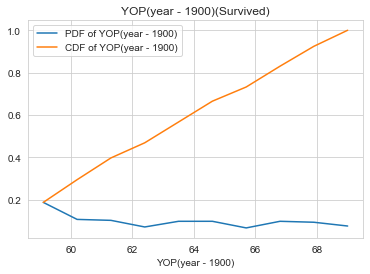

In [78]:
counts,bin_edges = np.histogram(Survived["YOP(year - 1900)"],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("YOP(year - 1900)")
plt.legend(["PDF of YOP(year - 1900)","CDF of YOP(year - 1900)"])
plt.title("YOP(year - 1900)(Survived)")
plt.show()

Obervation(s):
1. Chances of Survival in year of operation 1958 was around 18%(highest in the Data).


YOP(year-1900)(Not_survived):

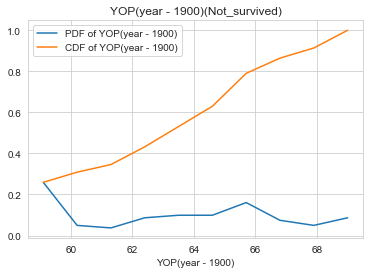

In [79]:
counts,bin_edges = np.histogram(Not_survived["YOP(year - 1900)"],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("YOP(year - 1900)")
plt.legend(["PDF of YOP(year - 1900)","CDF of YOP(year - 1900)"])
plt.title("YOP(year - 1900)(Not_survived)")
plt.show()

Observation(s):
1. Chance of patient not surviving in the yop(1960-1962) is low(around 5%). 

positive axillary nodes(Survived):

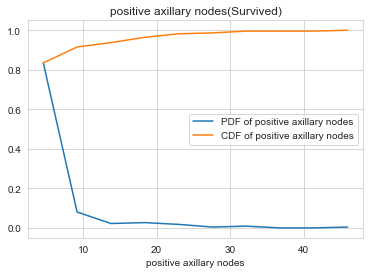

In [80]:
counts,bin_edges = np.histogram(Survived["positive axillary nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("positive axillary nodes")
plt.legend(["PDF of positive axillary nodes","CDF of positive axillary nodes"])
plt.title("positive axillary nodes(Survived)")
plt.show()

Observation(s):
1. Survival rate is very low as number of positive axillary nodes goes above 10.
2. Survival rate decreases as number of positive axillary nodes increases.
3. 85% of the patient Survived have number of positive axillary nodes less than 4.
4. There are nearly zero% chances of survival of patients having number of positive axillary nodes more than 25.

positive axillary nodes(Not_survived):


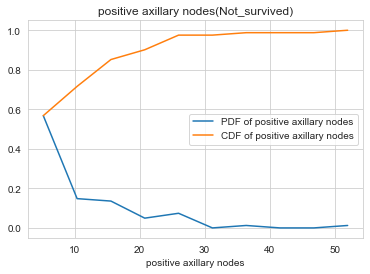

In [81]:
counts,bin_edges = np.histogram(Not_survived["positive axillary nodes"],bins=10,density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("positive axillary nodes")
plt.legend(["PDF of positive axillary nodes","CDF of positive axillary nodes"])
plt.title("positive axillary nodes(Not_survived)")
plt.show()

Observation(s):
1. 70% of the patient not survived having number of positive axillary nodes <= 10. 

# Mean, Variance and Std-dev

In [82]:
#Mean and std_dev:
print("Means and Std-dev:\n")
print("Age(Survived):","mean:",np.mean(Survived["Age"])," Std-dev:",np.std(Survived["Age"]))
print("Age(Not_survived):","mean:",np.mean(Not_survived["Age"])," Std-dev:",np.std(Not_survived["Age"]))

print("\nPositive Axillary Nodes(Survived):","mean:",np.mean(Survived["positive axillary nodes"]),"Std_dev:",np.std(Survived["positive axillary nodes"]))
print("Positive Axillary Nodes(Not_survived):","mean:",np.mean(Not_survived["positive axillary nodes"]),"Std_dev:",np.std(Not_survived["positive axillary nodes"]))

print("\nYear of operation(year-1900)(Survived):","mean:",np.mean(Survived["YOP(year - 1900)"]),"Std_dev:",np.std(Survived["YOP(year - 1900)"]))
print("Year of operation(year-1900)(Not_survived):","mean:",np.mean(Not_survived["YOP(year - 1900)"]),"Std_dev:",np.std(Not_survived["YOP(year - 1900)"]))

Means and Std-dev:

Age(Survived): mean: 52.11607142857143  Std-dev: 10.913004640364269
Age(Not_survived): mean: 53.67901234567901  Std-dev: 10.10418219303131

Positive Axillary Nodes(Survived): mean: 2.799107142857143 Std_dev: 5.869092706952767
Positive Axillary Nodes(Not_survived): mean: 7.45679012345679 Std_dev: 9.128776076761632

Year of operation(year-1900)(Survived): mean: 62.857142857142854 Std_dev: 3.2220145175061514
Year of operation(year-1900)(Not_survived): mean: 62.82716049382716 Std_dev: 3.3214236255207883


# Qauntiles,percentiles:

In [83]:
#Qauntiles, Percentiles
print("Quantiles:\n")
print("Quantiles Age Survived:")
#0,25,50,75,100th percentile
print(np.percentile(Survived["Age"],np.arange(0,101,25)))

print("Quantiles Age Not_survived:")
print(np.percentile(Not_survived["Age"],np.arange(0,101,25)))

print("\nQuantiles positive axillary nodes Survived:")
print(np.percentile(Survived["positive axillary nodes"],np.arange(0,101,25)))
print("Quantiles positive axillary nodes Not_survived:")
print(np.percentile(Not_survived["positive axillary nodes"],np.arange(0,101,25)))

print("\nQuantiles YOP(year - 1900) Survived:")
print(np.percentile(Survived["YOP(year - 1900)"],np.arange(0,101,25)))
print("Quantiles YOP(year - 1900) Not_survived:")
print(np.percentile(Not_survived["YOP(year - 1900)"],np.arange(0,101,25)))



Quantiles:

Quantiles Age Survived:
[30. 43. 52. 60. 77.]
Quantiles Age Not_survived:
[34. 46. 53. 61. 83.]

Quantiles positive axillary nodes Survived:
[ 0.  0.  0.  3. 46.]
Quantiles positive axillary nodes Not_survived:
[ 0.  1.  4. 11. 52.]

Quantiles YOP(year - 1900) Survived:
[58. 60. 63. 66. 69.]
Quantiles YOP(year - 1900) Not_survived:
[58. 59. 63. 65. 69.]


# Box plot 

Age : Box Plot

[]

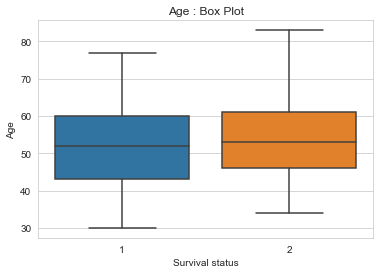

In [84]:
sns.boxplot(x="Survival status",y="Age",data=haberman)
plt.title("Age : Box Plot")
plt.plot()

Obervation(s):
1. 25th percentile of patients of Survival Status 1 is around 43 while for Survival Status 2 is around 46.
2. 50th percentile(Median) of patients Survival Status 1 is around 52 while for Survival Status 2 is around 53.
3. 75th percentile of patients of Survival Status 1 is 60 while for Survival Status 2 is 61.
4. Generally Age of people of Survival Status 2 is higher than of Survival Status 1.


Positive axillary nodes : Box-Plot

[]

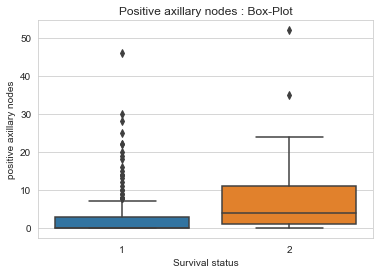

In [85]:
sns.boxplot(x="Survival status",y="positive axillary nodes",data=haberman)
plt.title("Positive axillary nodes : Box-Plot")
plt.plot()

Obervation(s):
1. Most of the patient who Survived have less number of positive axillary nodes than those who didn't Survived.
2. 25th and 50th percentile of Survival Status 1 patient's is 0 which means 50% of pateints who survived has Zero positive axillary nodes.

YOP(year - 1900) : Box-Plot

[]

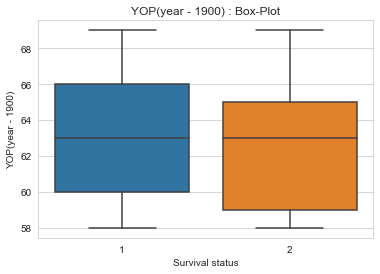

In [86]:
sns.boxplot(x="Survival status",y="YOP(year - 1900)",data=haberman)
plt.title("YOP(year - 1900) : Box-Plot")
plt.plot()

Observation(s):
1. 50th percentile(Median) of both the Survival Status is 63(same).


# Multivariate probability density, contour plot.

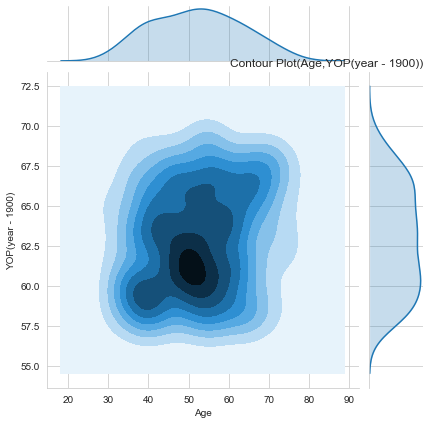

In [87]:
sns.jointplot(x="Age",y="YOP(year - 1900)",data=Survived,kind="kde")
plt.title("Contour Plot(Age,YOP(year - 1900))",loc="right")
plt.show()

Observation(s):
1. Most of the patients who survived are of age group(48-55) and has YOP in group(60-62.5).


# Conclusion(s):

1. Data has highly overlapping attributes, it will be less accurate if we selects particular attribute(s) and reject other(s) to get any conclusion.
2. Positive axillary nodes can act as a deciding factor for whether patient Survived or Not_survived.
3. Genrallly, patient's having less number of positive axillary nodes have higher chance of Survival Status 1(Survived).